In [1]:
#HackBio Internship


In [2]:
!pip install chembl-webresource-client
!pip install rdkit-pypi
!pip install mordred

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 34.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.8/128.8 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 28.2 MB/s eta 0:00:00
  Created wheel for mordred: filename=mordred-1.2.0-py3-none-any.whl size=176717 sha256=5aa40b6a057e32c3dd406bb2bd785247838cd3f0024bb62b3547a0631b097bff
  Stored in directory: /root/.cache/pip/wheels/a7/4f/b8/d4c6591f6ac944aaced7865b349477695f662388ad958743c7
Successfully built mordred
  Attempting uninstall: networkx
    Found existing installation: networkx 3.3
    Uninstalling networkx-3.3:
      Successfully uninstalled networkx-3.3


In [3]:
#import libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client
import numpy as np
import rdkit
from rdkit.Chem import Descriptors, Lipinski
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from mordred import Calculator, descriptors

In [5]:
#Target search for Protein S100-A9
my_target = new_client.target
my_target_query = my_target.search('S100')
my_targets = pd.DataFrame.from_dict(my_target_query)
my_targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P04271', 'xref_name': None, 'xre...",Homo sapiens,S-100 protein beta chain,17.0,False,CHEMBL4300,"[{'accession': 'P04271', 'component_descriptio...",SINGLE PROTEIN,9606
1,[],Homo sapiens,Protein S100-A4,17.0,False,CHEMBL2362976,"[{'accession': 'P26447', 'component_descriptio...",SINGLE PROTEIN,9606
2,[],Rattus norvegicus,Protein S100-B,17.0,False,CHEMBL3763006,"[{'accession': 'P04631', 'component_descriptio...",SINGLE PROTEIN,10116
3,[],Homo sapiens,Protein S100-A9,15.0,False,CHEMBL4296265,"[{'accession': 'P06702', 'component_descriptio...",SINGLE PROTEIN,9606
4,[],Homo sapiens,Annexin A2/S100-A10,12.0,False,CHEMBL2111435,"[{'accession': 'P07355', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606


In [6]:
#select and retrieve biactivity data for target
selected_target = my_targets.target_chembl_id[3]
selected_target

'CHEMBL4296265'

In [7]:

# Retrieve only bioactivity data for Protein S100-A9
activity = new_client.activity
data = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [8]:
df = pd.DataFrame.from_dict(data)

In [9]:
df.head(5)

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,19330734,[],CHEMBL4418749,Binding affinity to biotinylated recombinant h...,B,None,None,BAO_0000190,...,Homo sapiens,Protein S100-A9,9606,None,None,IC50,uM,UO_0000065,None,0.12
1,None,None,19330735,[],CHEMBL4418749,Binding affinity to biotinylated recombinant h...,B,None,None,BAO_0000190,...,Homo sapiens,Protein S100-A9,9606,None,None,IC50,uM,UO_0000065,None,1.0
2,None,None,19330736,[],CHEMBL4418749,Binding affinity to biotinylated recombinant h...,B,None,None,BAO_0000190,...,Homo sapiens,Protein S100-A9,9606,None,None,IC50,uM,UO_0000065,None,3.1
3,None,None,19330737,[],CHEMBL4418749,Binding affinity to biotinylated recombinant h...,B,None,None,BAO_0000190,...,Homo sapiens,Protein S100-A9,9606,None,None,IC50,uM,UO_0000065,None,1.0
4,None,None,19330738,[],CHEMBL4418749,Binding affinity to biotinylated recombinant h...,B,None,None,BAO_0000190,...,Homo sapiens,Protein S100-A9,9606,None,None,IC50,uM,UO_0000065,None,0.14


In [10]:
#Handling missing data
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,19330734,[],CHEMBL4418749,Binding affinity to biotinylated recombinant h...,B,None,None,BAO_0000190,...,Homo sapiens,Protein S100-A9,9606,None,None,IC50,uM,UO_0000065,None,0.12
1,None,None,19330735,[],CHEMBL4418749,Binding affinity to biotinylated recombinant h...,B,None,None,BAO_0000190,...,Homo sapiens,Protein S100-A9,9606,None,None,IC50,uM,UO_0000065,None,1.0
2,None,None,19330736,[],CHEMBL4418749,Binding affinity to biotinylated recombinant h...,B,None,None,BAO_0000190,...,Homo sapiens,Protein S100-A9,9606,None,None,IC50,uM,UO_0000065,None,3.1
3,None,None,19330737,[],CHEMBL4418749,Binding affinity to biotinylated recombinant h...,B,None,None,BAO_0000190,...,Homo sapiens,Protein S100-A9,9606,None,None,IC50,uM,UO_0000065,None,1.0
4,None,None,19330738,[],CHEMBL4418749,Binding affinity to biotinylated recombinant h...,B,None,None,BAO_0000190,...,Homo sapiens,Protein S100-A9,9606,None,None,IC50,uM,UO_0000065,None,0.14
5,None,None,19330744,[],CHEMBL4418749,Binding affinity to biotinylated recombinant h...,B,None,None,BAO_0000190,...,Homo sapiens,Protein S100-A9,9606,None,None,IC50,uM,UO_0000065,None,0.1
6,None,None,19330745,[],CHEMBL4418749,Binding affinity to biotinylated recombinant h...,B,None,None,BAO_0000190,...,Homo sapiens,Protein S100-A9,9606,None,None,IC50,uM,UO_0000065,None,3.0
7,None,None,19330746,[],CHEMBL4418749,Binding affinity to biotinylated recombinant h...,B,None,None,BAO_0000190,...,Homo sapiens,Protein S100-A9,9606,None,None,IC50,uM,UO_0000065,None,1.0
8,None,None,19330747,[],CHEMBL4418749,Binding affinity to biotinylated recombinant h...,B,None,None,BAO_0000190,...,Homo sapiens,Protein S100-A9,9606,None,None,IC50,uM,UO_0000065,None,2.8
9,None,None,19330748,[],CHEMBL4418749,Binding affinity to biotinylated recombinant h...,B,None,None,BAO_0000190,...,Homo sapiens,Protein S100-A9,9606,None,None,IC50,uM,UO_0000065,None,4.4


In [11]:
len(df2.canonical_smiles.unique())

58

In [12]:
df2_nr = df2.drop_duplicates(['canonical_smiles'])
df2_nr

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,19330734,[],CHEMBL4418749,Binding affinity to biotinylated recombinant h...,B,None,None,BAO_0000190,...,Homo sapiens,Protein S100-A9,9606,None,None,IC50,uM,UO_0000065,None,0.12
1,None,None,19330735,[],CHEMBL4418749,Binding affinity to biotinylated recombinant h...,B,None,None,BAO_0000190,...,Homo sapiens,Protein S100-A9,9606,None,None,IC50,uM,UO_0000065,None,1.0
2,None,None,19330736,[],CHEMBL4418749,Binding affinity to biotinylated recombinant h...,B,None,None,BAO_0000190,...,Homo sapiens,Protein S100-A9,9606,None,None,IC50,uM,UO_0000065,None,3.1
3,None,None,19330737,[],CHEMBL4418749,Binding affinity to biotinylated recombinant h...,B,None,None,BAO_0000190,...,Homo sapiens,Protein S100-A9,9606,None,None,IC50,uM,UO_0000065,None,1.0
4,None,None,19330738,[],CHEMBL4418749,Binding affinity to biotinylated recombinant h...,B,None,None,BAO_0000190,...,Homo sapiens,Protein S100-A9,9606,None,None,IC50,uM,UO_0000065,None,0.14
5,None,None,19330744,[],CHEMBL4418749,Binding affinity to biotinylated recombinant h...,B,None,None,BAO_0000190,...,Homo sapiens,Protein S100-A9,9606,None,None,IC50,uM,UO_0000065,None,0.1
6,None,None,19330745,[],CHEMBL4418749,Binding affinity to biotinylated recombinant h...,B,None,None,BAO_0000190,...,Homo sapiens,Protein S100-A9,9606,None,None,IC50,uM,UO_0000065,None,3.0
7,None,None,19330746,[],CHEMBL4418749,Binding affinity to biotinylated recombinant h...,B,None,None,BAO_0000190,...,Homo sapiens,Protein S100-A9,9606,None,None,IC50,uM,UO_0000065,None,1.0
8,None,None,19330747,[],CHEMBL4418749,Binding affinity to biotinylated recombinant h...,B,None,None,BAO_0000190,...,Homo sapiens,Protein S100-A9,9606,None,None,IC50,uM,UO_0000065,None,2.8
9,None,None,19330748,[],CHEMBL4418749,Binding affinity to biotinylated recombinant h...,B,None,None,BAO_0000190,...,Homo sapiens,Protein S100-A9,9606,None,None,IC50,uM,UO_0000065,None,4.4


In [13]:
#Data pre-processing of the bioactivity data

In [14]:
#print the entire column title
columns_list = df2_nr.columns.tolist()

print(columns_list)

['action_type', 'activity_comment', 'activity_id', 'activity_properties', 'assay_chembl_id', 'assay_description', 'assay_type', 'assay_variant_accession', 'assay_variant_mutation', 'bao_endpoint', 'bao_format', 'bao_label', 'canonical_smiles', 'data_validity_comment', 'data_validity_description', 'document_chembl_id', 'document_journal', 'document_year', 'ligand_efficiency', 'molecule_chembl_id', 'molecule_pref_name', 'parent_molecule_chembl_id', 'pchembl_value', 'potential_duplicate', 'qudt_units', 'record_id', 'relation', 'src_id', 'standard_flag', 'standard_relation', 'standard_text_value', 'standard_type', 'standard_units', 'standard_upper_value', 'standard_value', 'target_chembl_id', 'target_organism', 'target_pref_name', 'target_tax_id', 'text_value', 'toid', 'type', 'units', 'uo_units', 'upper_value', 'value']


In [15]:

#Table of selected bioactivity data of interest
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_nr[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL4522931,O=S(=O)(Cc1cc(Cl)cc(Cl)c1)Nc1ncc(Cl)cc1O,120.0
1,CHEMBL4522252,CC(C)c1cnc(NS(=O)(=O)c2cnc(Cl)c(Br)c2)c(O)c1,1000.0
2,CHEMBL4440704,CC(CO)c1cnc(NS(=O)(=O)c2cnc(Cl)c(Br)c2)c(O)c1,3100.0
3,CHEMBL4435775,O=S(=O)(Cc1cc(Cl)sc1Cl)Nc1ncc(Cl)cc1O,1000.0
4,CHEMBL4464961,CS(=O)(=O)c1cnc(NS(=O)(=O)Cc2cc(Cl)cc(Cl)c2)c(...,140.0
5,CHEMBL4452496,O=S(=O)(Cc1cc(Cl)cc(Cl)c1)Nc1nnc(Cl)cc1O,100.0
6,CHEMBL4574262,O=S(=O)(Nc1ncc(Cl)cc1O)c1cncc(Br)c1,3000.0
7,CHEMBL4552240,O=S(=O)(Nc1ncc(Cl)cc1O)c1ccc(C(F)(F)F)nc1,1000.0
8,CHEMBL4519288,COc1ncc(S(=O)(=O)Nc2cncc(Cl)c2O)cc1Br,2800.0
9,CHEMBL4585830,COc1ncc(S(=O)(=O)Nc2cnccc2O)cc1Br,4400.0


In [16]:
#Labeling compunds as either being acive, inactive or intermediate

In [17]:
bioactivity_threshold = []
for i in df3.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")


In [18]:
df3.head()

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL4522931,O=S(=O)(Cc1cc(Cl)cc(Cl)c1)Nc1ncc(Cl)cc1O,120.0
1,CHEMBL4522252,CC(C)c1cnc(NS(=O)(=O)c2cnc(Cl)c(Br)c2)c(O)c1,1000.0
2,CHEMBL4440704,CC(CO)c1cnc(NS(=O)(=O)c2cnc(Cl)c(Br)c2)c(O)c1,3100.0
3,CHEMBL4435775,O=S(=O)(Cc1cc(Cl)sc1Cl)Nc1ncc(Cl)cc1O,1000.0
4,CHEMBL4464961,CS(=O)(=O)c1cnc(NS(=O)(=O)Cc2cc(Cl)cc(Cl)c2)c(...,140.0


In [19]:
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df4 = pd.concat([df3, bioactivity_class], axis=1)
df4.head()

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL4522931,O=S(=O)(Cc1cc(Cl)cc(Cl)c1)Nc1ncc(Cl)cc1O,120.0,active
1,CHEMBL4522252,CC(C)c1cnc(NS(=O)(=O)c2cnc(Cl)c(Br)c2)c(O)c1,1000.0,active
2,CHEMBL4440704,CC(CO)c1cnc(NS(=O)(=O)c2cnc(Cl)c(Br)c2)c(O)c1,3100.0,intermediate
3,CHEMBL4435775,O=S(=O)(Cc1cc(Cl)sc1Cl)Nc1ncc(Cl)cc1O,1000.0,active
4,CHEMBL4464961,CS(=O)(=O)c1cnc(NS(=O)(=O)Cc2cc(Cl)cc(Cl)c2)c(...,140.0,active


In [20]:
#Calculate Lipinski descriptors


In [21]:
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
import pandas as pd
import numpy as np

In [22]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation
# Addition of Lipinski Descriptors
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        # Check if elem is a valid SMILES string before converting
        if isinstance(elem, str):
            mol=Chem.MolFromSmiles(elem)
            moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [23]:

#Run lipinski using canonical_smiles
df_lipinski = lipinski(df4.canonical_smiles)

In [24]:
#View lipinski Descriptors
df_lipinski.head()

,MW,LogP,NumHDonors,NumHAcceptors
0,367.641,3.6893,2.0,4.0
1,406.689,3.5223,2.0,5.0
2,422.688,2.4947,3.0,6.0
3,373.670,3.7508,2.0,5.0
4,411.288,2.4394,2.0,6.0


In [25]:
df4.head()

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL4522931,O=S(=O)(Cc1cc(Cl)cc(Cl)c1)Nc1ncc(Cl)cc1O,120.0,active
1,CHEMBL4522252,CC(C)c1cnc(NS(=O)(=O)c2cnc(Cl)c(Br)c2)c(O)c1,1000.0,active
2,CHEMBL4440704,CC(CO)c1cnc(NS(=O)(=O)c2cnc(Cl)c(Br)c2)c(O)c1,3100.0,intermediate
3,CHEMBL4435775,O=S(=O)(Cc1cc(Cl)sc1Cl)Nc1ncc(Cl)cc1O,1000.0,active
4,CHEMBL4464961,CS(=O)(=O)c1cnc(NS(=O)(=O)Cc2cc(Cl)cc(Cl)c2)c(...,140.0,active


In [26]:
#Combine df4 table with lipinski value table
df_combined = pd.concat([df4,df_lipinski], axis=1)

In [27]:
#View new combined table
df_combined.head()

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL4522931,O=S(=O)(Cc1cc(Cl)cc(Cl)c1)Nc1ncc(Cl)cc1O,120.0,active,367.641,3.6893,2.0,4.0
1,CHEMBL4522252,CC(C)c1cnc(NS(=O)(=O)c2cnc(Cl)c(Br)c2)c(O)c1,1000.0,active,406.689,3.5223,2.0,5.0
2,CHEMBL4440704,CC(CO)c1cnc(NS(=O)(=O)c2cnc(Cl)c(Br)c2)c(O)c1,3100.0,intermediate,422.688,2.4947,3.0,6.0
3,CHEMBL4435775,O=S(=O)(Cc1cc(Cl)sc1Cl)Nc1ncc(Cl)cc1O,1000.0,active,373.670,3.7508,2.0,5.0
4,CHEMBL4464961,CS(=O)(=O)c1cnc(NS(=O)(=O)Cc2cc(Cl)cc(Cl)c2)c(...,140.0,active,411.288,2.4394,2.0,6.0


In [28]:
#Describe combines table with standard value
df_combined.standard_value.describe()

,standard_value
count,58
unique,30
top,1000.0
freq,24


In [29]:
#Convert IC50 to pIC50


In [30]:
#Import library
import numpy as np
#convert IC50 to pIC50
def pIC50(input):
    pIC50 = []

    for i in input['standard_value']:
        try: # this will try to convert i to a float
            i = float(i)
        except ValueError: # if i is not a number, set molar to 0
            molar = 0
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value', axis = 1)

    return x


In [31]:
df_final = pIC50(df_combined)
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL4522931,O=S(=O)(Cc1cc(Cl)cc(Cl)c1)Nc1ncc(Cl)cc1O,active,367.641,3.68930,2.0,4.0,6.920819
1,CHEMBL4522252,CC(C)c1cnc(NS(=O)(=O)c2cnc(Cl)c(Br)c2)c(O)c1,active,406.689,3.52230,2.0,5.0,6.000000
2,CHEMBL4440704,CC(CO)c1cnc(NS(=O)(=O)c2cnc(Cl)c(Br)c2)c(O)c1,intermediate,422.688,2.49470,3.0,6.0,5.508638
3,CHEMBL4435775,O=S(=O)(Cc1cc(Cl)sc1Cl)Nc1ncc(Cl)cc1O,active,373.670,3.75080,2.0,5.0,6.000000
4,CHEMBL4464961,CS(=O)(=O)c1cnc(NS(=O)(=O)Cc2cc(Cl)cc(Cl)c2)c(...,active,411.288,2.43940,2.0,6.0,6.853872
5,CHEMBL4452496,O=S(=O)(Cc1cc(Cl)cc(Cl)c1)Nc1nnc(Cl)cc1O,active,368.629,3.08430,2.0,5.0,7.000000
6,CHEMBL4574262,O=S(=O)(Nc1ncc(Cl)cc1O)c1cncc(Br)c1,intermediate,364.608,2.39890,2.0,5.0,5.522879
7,CHEMBL4552240,O=S(=O)(Nc1ncc(Cl)cc1O)c1ccc(C(F)(F)F)nc1,active,353.709,2.65520,2.0,5.0,6.000000
8,CHEMBL4519288,COc1ncc(S(=O)(=O)Nc2cncc(Cl)c2O)cc1Br,intermediate,394.634,2.40750,2.0,6.0,5.552842
9,CHEMBL4585830,COc1ncc(S(=O)(=O)Nc2cnccc2O)cc1Br,intermediate,360.189,1.75410,2.0,6.0,5.356547


In [32]:
#Describe the pIC50 column
df_final.pIC50.describe()

,pIC50
count,58.000000
mean,6.025618
std,0.437873
min,5.292430
25%,5.744727
50%,6.000000
75%,6.074876
max,7.000000


In [33]:
#Chemical Space Analysis

In [34]:
#Import Library for Data Expoloration
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

Text(0, 0.5, 'Frequency')

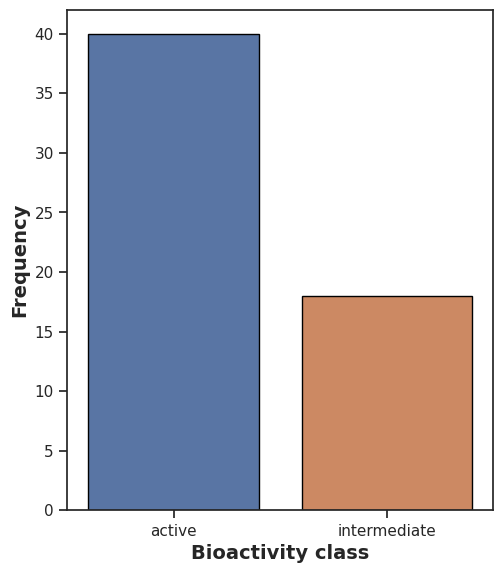

In [35]:
#Plot graph for bioactivity class
plt.figure(figsize=(5.5, 6.5))

sns.countplot(x='class', data=df_final, edgecolor='black', hue = 'class')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

#plt.savefig('pfht1_plot_bioactivity_class.pdf')

In [36]:
#Scatter plot of MV versus LogP

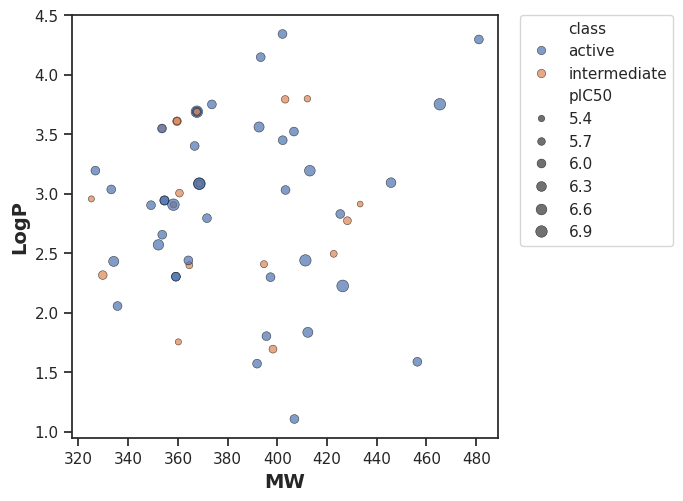

In [37]:
#Scatter Plot for MV vs LogP
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_final, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
#plt.savefig('plot_MW_vs_LogP.pdf')

In [38]:

df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL4522931,O=S(=O)(Cc1cc(Cl)cc(Cl)c1)Nc1ncc(Cl)cc1O,active,367.641,3.68930,2.0,4.0,6.920819
1,CHEMBL4522252,CC(C)c1cnc(NS(=O)(=O)c2cnc(Cl)c(Br)c2)c(O)c1,active,406.689,3.52230,2.0,5.0,6.000000
2,CHEMBL4440704,CC(CO)c1cnc(NS(=O)(=O)c2cnc(Cl)c(Br)c2)c(O)c1,intermediate,422.688,2.49470,3.0,6.0,5.508638
3,CHEMBL4435775,O=S(=O)(Cc1cc(Cl)sc1Cl)Nc1ncc(Cl)cc1O,active,373.670,3.75080,2.0,5.0,6.000000
4,CHEMBL4464961,CS(=O)(=O)c1cnc(NS(=O)(=O)Cc2cc(Cl)cc(Cl)c2)c(...,active,411.288,2.43940,2.0,6.0,6.853872
5,CHEMBL4452496,O=S(=O)(Cc1cc(Cl)cc(Cl)c1)Nc1nnc(Cl)cc1O,active,368.629,3.08430,2.0,5.0,7.000000
6,CHEMBL4574262,O=S(=O)(Nc1ncc(Cl)cc1O)c1cncc(Br)c1,intermediate,364.608,2.39890,2.0,5.0,5.522879
7,CHEMBL4552240,O=S(=O)(Nc1ncc(Cl)cc1O)c1ccc(C(F)(F)F)nc1,active,353.709,2.65520,2.0,5.0,6.000000
8,CHEMBL4519288,COc1ncc(S(=O)(=O)Nc2cncc(Cl)c2O)cc1Br,intermediate,394.634,2.40750,2.0,6.0,5.552842
9,CHEMBL4585830,COc1ncc(S(=O)(=O)Nc2cnccc2O)cc1Br,intermediate,360.189,1.75410,2.0,6.0,5.356547


In [39]:
#Remove NaN
df_cleaned = df_final.dropna()

df_cleaned

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL4522931,O=S(=O)(Cc1cc(Cl)cc(Cl)c1)Nc1ncc(Cl)cc1O,active,367.641,3.68930,2.0,4.0,6.920819
1,CHEMBL4522252,CC(C)c1cnc(NS(=O)(=O)c2cnc(Cl)c(Br)c2)c(O)c1,active,406.689,3.52230,2.0,5.0,6.000000
2,CHEMBL4440704,CC(CO)c1cnc(NS(=O)(=O)c2cnc(Cl)c(Br)c2)c(O)c1,intermediate,422.688,2.49470,3.0,6.0,5.508638
3,CHEMBL4435775,O=S(=O)(Cc1cc(Cl)sc1Cl)Nc1ncc(Cl)cc1O,active,373.670,3.75080,2.0,5.0,6.000000
4,CHEMBL4464961,CS(=O)(=O)c1cnc(NS(=O)(=O)Cc2cc(Cl)cc(Cl)c2)c(...,active,411.288,2.43940,2.0,6.0,6.853872
5,CHEMBL4452496,O=S(=O)(Cc1cc(Cl)cc(Cl)c1)Nc1nnc(Cl)cc1O,active,368.629,3.08430,2.0,5.0,7.000000
6,CHEMBL4574262,O=S(=O)(Nc1ncc(Cl)cc1O)c1cncc(Br)c1,intermediate,364.608,2.39890,2.0,5.0,5.522879
7,CHEMBL4552240,O=S(=O)(Nc1ncc(Cl)cc1O)c1ccc(C(F)(F)F)nc1,active,353.709,2.65520,2.0,5.0,6.000000
8,CHEMBL4519288,COc1ncc(S(=O)(=O)Nc2cncc(Cl)c2O)cc1Br,intermediate,394.634,2.40750,2.0,6.0,5.552842
9,CHEMBL4585830,COc1ncc(S(=O)(=O)Nc2cnccc2O)cc1Br,intermediate,360.189,1.75410,2.0,6.0,5.356547


In [40]:
#subset the pIC50
pIC = df_final[("pIC50")]


In [41]:
# There might be one or more valid SMILES that can represent one compound
# Thanks to Pat Walters for this information,checkout his excellent blog: https://www.blogger.com/profile/18223198920629617711
def canonical_smiles(smiles):
    mols = [Chem.MolFromSmiles(smi) for smi in smiles]
    smiles = [Chem.MolToSmiles(mol) for mol in mols]
    return smiles

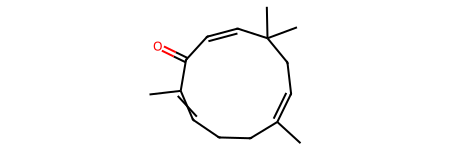

In [43]:
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

Zerumbone=Chem.MolFromSmiles('C/C/1=C\CC(/C=C/C(=O)/C(=C/CC1)/C)(C)C')
Zerumbone

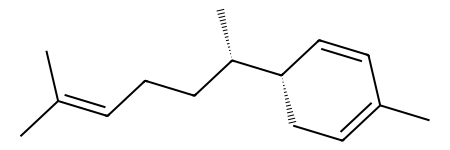

In [44]:
Zingiberene=Chem.MolFromSmiles('CC1=CC[C@@H](C=C1)[C@@H](C)CCC=C(C)C')
Zingiberene


In [45]:
#generate a dataframe with ligand and smiles column

ligand_smiles_df = pd.DataFrame({'Ligand': ['Zerumbone', 'Zingiberene'],
                                'Smiles': ['C/C/1=C\CC(/C=C/C(=O)/C(=C/CC1)/C)(C)C',
                                        'CC1=CC[C@@H](C=C1)[C@@H](C)CCC=C(C)C']})
print(ligand_smiles_df)

        Ligand                                  Smiles
0    Zerumbone  C/C/1=C\CC(/C=C/C(=O)/C(=C/CC1)/C)(C)C
1  Zingiberene    CC1=CC[C@@H](C=C1)[C@@H](C)CCC=C(C)C


In [46]:
# Run Lipinski on the new DataFrame
ligand_lipinski = lipinski(ligand_smiles_df.Smiles)
ligand_lipinski


,MW,LogP,NumHDonors,NumHAcceptors
0,218.340,4.2144,0.0,1.0
1,204.357,4.8913,0.0,0.0


In [47]:
#Calculate descriptors using RDkit

In [48]:
def RDkit_descriptors(smiles):
    mols = [Chem.MolFromSmiles(i) for i in smiles]
    calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
    desc_names = calc.GetDescriptorNames()

    Mol_descriptors =[]
    for mol in mols:
        # add hydrogens to molecules
        mol=Chem.AddHs(mol)
        # Calculate all 200 descriptors for each molecule
        descriptors = calc.CalcDescriptors(mol)
        Mol_descriptors.append(descriptors)
    return Mol_descriptors,desc_names

In [49]:
# Function call
Mol_descriptors,desc_names = RDkit_descriptors(df_cleaned["canonical_smiles"])

In [50]:
df_with_200_descriptors = pd.DataFrame(Mol_descriptors,columns=desc_names)
df_with_200_descriptors

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,12.892309,-5.535717,12.892309,0.556965,0.863505,367.641,358.569,365.939946,112,0,...,0,1,0,0,0,0,0,0,0,0
1,13.027130,-5.251623,13.027130,0.348038,0.757907,406.689,393.585,404.954952,118,0,...,0,1,0,0,0,0,0,0,0,0
2,13.058659,-5.273938,13.058659,0.357345,0.638219,422.688,409.584,420.949867,124,0,...,0,1,0,0,0,0,0,0,0,0
3,12.713320,-5.313927,12.713320,0.257136,0.855131,373.670,366.614,371.896367,108,0,...,0,1,0,0,0,0,0,1,0,0
4,13.073210,-5.817072,13.073210,0.774703,0.781513,411.288,399.192,409.956469,130,0,...,0,1,1,0,0,0,0,0,0,0
5,12.814456,-5.475625,12.814456,0.520299,0.864913,368.629,360.565,366.935195,112,0,...,0,1,0,0,0,0,0,0,0,0
6,12.677618,-4.958017,12.677618,0.299172,0.872251,364.608,357.552,362.908002,100,0,...,0,1,0,0,0,0,0,0,0,0
7,12.838280,-5.377524,12.838280,0.566391,0.884640,353.709,346.653,352.984874,118,0,...,0,1,0,0,0,0,0,0,0,0
8,12.907435,-5.127916,12.907435,0.359773,0.825553,394.634,385.562,392.918567,112,0,...,0,1,0,0,0,0,0,0,0,0
9,12.889295,-5.152607,12.889295,0.395329,0.861612,360.189,350.109,358.957539,106,0,...,0,1,0,0,0,0,0,0,0,0


In [51]:
fp_pIC = pd.concat([df_with_200_descriptors, df_lipinski, pIC], axis=1)

In [52]:
#View Table after concatenate
fp_pIC.head()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,12.892309,-5.535717,12.892309,0.556965,0.863505,367.641,358.569,365.939946,112,0,...,0,0,0,0,0,367.641,3.6893,2.0,4.0,6.920819
1,13.027130,-5.251623,13.027130,0.348038,0.757907,406.689,393.585,404.954952,118,0,...,0,0,0,0,0,406.689,3.5223,2.0,5.0,6.000000
2,13.058659,-5.273938,13.058659,0.357345,0.638219,422.688,409.584,420.949867,124,0,...,0,0,0,0,0,422.688,2.4947,3.0,6.0,5.508638
3,12.713320,-5.313927,12.713320,0.257136,0.855131,373.670,366.614,371.896367,108,0,...,0,0,1,0,0,373.670,3.7508,2.0,5.0,6.000000
4,13.073210,-5.817072,13.073210,0.774703,0.781513,411.288,399.192,409.956469,130,0,...,0,0,0,0,0,411.288,2.4394,2.0,6.0,6.853872


In [53]:
# the Molecular is now in duplicate, one from Lipinski df (MW) and the other from the molecular descriptor (MolWt), you can drop one
fp_pIC = fp_pIC.drop('MW', axis=1)

In [54]:
fp_pIC

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,LogP,NumHDonors,NumHAcceptors,pIC50
0,12.892309,-5.535717,12.892309,0.556965,0.863505,367.641,358.569,365.939946,112,0,...,0,0,0,0,0,0,3.68930,2.0,4.0,6.920819
1,13.027130,-5.251623,13.027130,0.348038,0.757907,406.689,393.585,404.954952,118,0,...,0,0,0,0,0,0,3.52230,2.0,5.0,6.000000
2,13.058659,-5.273938,13.058659,0.357345,0.638219,422.688,409.584,420.949867,124,0,...,0,0,0,0,0,0,2.49470,3.0,6.0,5.508638
3,12.713320,-5.313927,12.713320,0.257136,0.855131,373.670,366.614,371.896367,108,0,...,0,0,0,1,0,0,3.75080,2.0,5.0,6.000000
4,13.073210,-5.817072,13.073210,0.774703,0.781513,411.288,399.192,409.956469,130,0,...,0,0,0,0,0,0,2.43940,2.0,6.0,6.853872
5,12.814456,-5.475625,12.814456,0.520299,0.864913,368.629,360.565,366.935195,112,0,...,0,0,0,0,0,0,3.08430,2.0,5.0,7.000000
6,12.677618,-4.958017,12.677618,0.299172,0.872251,364.608,357.552,362.908002,100,0,...,0,0,0,0,0,0,2.39890,2.0,5.0,5.522879
7,12.838280,-5.377524,12.838280,0.566391,0.884640,353.709,346.653,352.984874,118,0,...,0,0,0,0,0,0,2.65520,2.0,5.0,6.000000
8,12.907435,-5.127916,12.907435,0.359773,0.825553,394.634,385.562,392.918567,112,0,...,0,0,0,0,0,0,2.40750,2.0,6.0,5.552842
9,12.889295,-5.152607,12.889295,0.395329,0.861612,360.189,350.109,358.957539,106,0,...,0,0,0,0,0,0,1.75410,2.0,6.0,5.356547


In [55]:
# Drop NaN
fp_pIC = fp_pIC.dropna()

In [56]:
ligand =RDkit_descriptors(ligand_smiles_df["Smiles"])
ligand = pd.DataFrame(ligand[0], columns=ligand[1])
ligand

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,13.100578,-4.465275,13.100578,2.009266,0.556439,218.340,196.164,218.167065,88,0,...,0,0,0,0,0,0,0,0,0,0
1,8.691928,-4.655905,8.691928,1.453699,0.571804,204.357,180.165,204.187801,84,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
# prompt: concatenate ligans, ligand_lipinski and ligand_smiles_df

ligand_combined = pd.concat([ligand_smiles_df, ligand_lipinski,ligand], axis=1)
ligand_combined

,Ligand,Smiles,MW,LogP,NumHDonors,NumHAcceptors,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,Zerumbone,C/C/1=C\CC(/C=C/C(=O)/C(=C/CC1)/C)(C)C,218.340,4.2144,0.0,1.0,13.100578,-4.465275,13.100578,2.009266,...,0,0,0,0,0,0,0,0,0,0
1,Zingiberene,CC1=CC[C@@H](C=C1)[C@@H](C)CCC=C(C)C,204.357,4.8913,0.0,0.0,8.691928,-4.655905,8.691928,1.453699,...,0,0,0,0,0,0,0,0,0,0


In [58]:
#remove smiles column
ligand_combined = ligand_combined.drop('Smiles', axis=1)
ligand_combined

,Ligand,MW,LogP,NumHDonors,NumHAcceptors,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,Zerumbone,218.340,4.2144,0.0,1.0,13.100578,-4.465275,13.100578,2.009266,0.556439,...,0,0,0,0,0,0,0,0,0,0
1,Zingiberene,204.357,4.8913,0.0,0.0,8.691928,-4.655905,8.691928,1.453699,0.571804,...,0,0,0,0,0,0,0,0,0,0


In [59]:
#remove MW column due to duplication
ligand_combined = ligand_combined.drop('MW', axis=1)
ligand_combined

,Ligand,LogP,NumHDonors,NumHAcceptors,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,Zerumbone,4.2144,0.0,1.0,13.100578,-4.465275,13.100578,2.009266,0.556439,218.340,...,0,0,0,0,0,0,0,0,0,0
1,Zingiberene,4.8913,0.0,0.0,8.691928,-4.655905,8.691928,1.453699,0.571804,204.357,...,0,0,0,0,0,0,0,0,0,0


In [60]:
#add pIC50 column
df_ligand_combined = pd.concat([ligand_combined, df_cleaned['pIC50']], axis=1)
df_ligand_combined

,Ligand,LogP,NumHDonors,NumHAcceptors,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,pIC50
0,Zerumbone,4.2144,0.0,1.0,13.100578,-4.465275,13.100578,2.009266,0.556439,218.340,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.920819
1,Zingiberene,4.8913,0.0,0.0,8.691928,-4.655905,8.691928,1.453699,0.571804,204.357,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.000000
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.508638
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.853872
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.522879
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.552842
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.356547


In [61]:
#drop NaN
df_ligand_combined = df_ligand_combined.dropna()
df_ligand_combined

,Ligand,LogP,NumHDonors,NumHAcceptors,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,pIC50
0,Zerumbone,4.2144,0.0,1.0,13.100578,-4.465275,13.100578,2.009266,0.556439,218.340,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.920819
1,Zingiberene,4.8913,0.0,0.0,8.691928,-4.655905,8.691928,1.453699,0.571804,204.357,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.000000


In [62]:

#create final ligand table without Ipc and ligand columns (cleaning for modeling)

# Remove 'Ligand' and 'pIC50' columns
final_ligand_table = df_ligand_combined.drop(['Ligand', 'Ipc'], axis=1)

# Display the final ligand table
print(final_ligand_table)


     LogP  NumHDonors  NumHAcceptors  MaxEStateIndex  MinEStateIndex  \
0  4.2144         0.0            1.0       13.100578       -4.465275   
1  4.8913         0.0            0.0        8.691928       -4.655905   

   MaxAbsEStateIndex  MinAbsEStateIndex       qed    MolWt  HeavyAtomMolWt  \
0          13.100578           2.009266  0.556439  218.340         196.164   
1           8.691928           1.453699  0.571804  204.357         180.165   

   ...  fr_sulfonamd  fr_sulfone  fr_term_acetylene  fr_tetrazole  \
0  ...           0.0         0.0                0.0           0.0   
1  ...           0.0         0.0                0.0           0.0   

   fr_thiazole  fr_thiocyan  fr_thiophene  fr_unbrch_alkane  fr_urea     pIC50  
0          0.0          0.0           0.0               0.0      0.0  6.920819  
1          0.0          0.0           0.0               0.0      0.0  6.000000  

[2 rows x 211 columns]


In [63]:
#Model Training Sets

In [64]:

#Library for Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [65]:
#define X and Y
X= fp_pIC.drop(columns=['pIC50'])
Y=fp_pIC.pIC50

In [66]:
#Slipt the data into trainig(80%) and testing sets(20%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [67]:
#remove Ipc column from X_train, X_test, Y_train, Y_test

if 'Ipc' in X_train.columns:
  X_train = X_train.drop('Ipc', axis=1)
if 'Ipc' in X_test.columns:
  X_test = X_test.drop('Ipc', axis=1)

In [68]:

#Print the shapes of the training and testing sets to confirm
print(f"Training set size: X_train: {X_train.shape}, Y_train: {Y_train.shape}")
print(f"Testing set size: X_test: {X_test.shape}, Y_test: {Y_test.shape}")

Training set size: X_train: (46, 210), Y_train: (46,)
Testing set size: X_test: (12, 210), Y_test: (12,)


In [69]:

Model= RandomForestRegressor(n_estimators=100, random_state=42)
Model.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [70]:
#In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [71]:
# Predictions on the test set (effects of the model on the data)
y_pred = Model.predict(X_test)
y_pred

array([6.3422225 , 6.45589022, 6.53359783, 5.84442954, 6.03050223,
       5.91833579, 5.99480296, 6.1799503 , 6.04340171, 5.80750658,
       5.90273742, 6.12718179])

In [72]:
#Ligand Prediction

In [73]:
#define X and Y
X_LIGAND= final_ligand_table.drop(columns=['pIC50'])
Y_LIGAND=final_ligand_table.pIC50

In [74]:
Model.fit(X_LIGAND, Y_LIGAND)

RandomForestRegressor(random_state=42)

In [76]:
#In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [77]:
#pIC50 prediction of ligands
ligand_prediction = Model.predict(X_LIGAND)
ligand_prediction

array([6.71823863, 6.23941288])

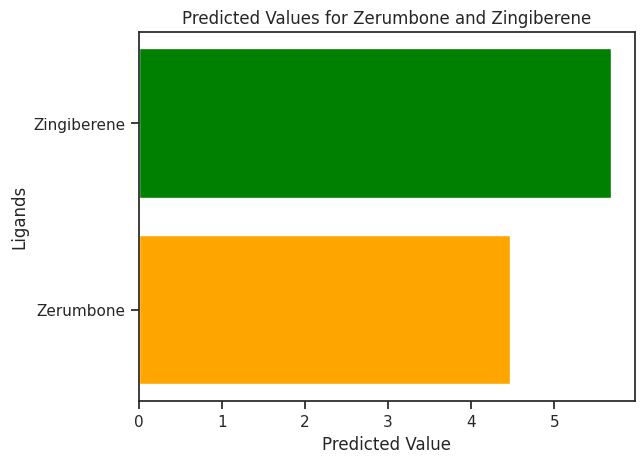

In [78]:
import matplotlib.pyplot as plt

ligands = ['Zerumbone', 'Zingiberene']
predicted_values = [4.47204827, 5.68563597]

plt.barh(ligands, predicted_values, color=['orange', 'green'])
plt.title('Predicted Values for Zerumbone and Zingiberene')
plt.xlabel('Predicted Value')
plt.ylabel('Ligands')
plt.show()


In [79]:
#Model Evaluation

In [80]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [81]:

mse = mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

In [82]:

print(f"MSE: {mse}, MAE: {mae}, R-squared: {r2}")

MSE: 0.15400779252195237, MAE: 0.31303814151988746, R-squared: 0.35696684250881394


In [83]:

mse_LIGAND = mean_squared_error(Y_LIGAND, ligand_prediction)
mae_LIGAND = mean_absolute_error(Y_LIGAND, ligand_prediction)
r2_LIGAND = r2_score(Y_LIGAND, ligand_prediction)

In [84]:
print(f"MSE_Ligand: {mse_LIGAND}, MAE_Ligand: {mae_LIGAND}, R-squared_Ligand: {r2_LIGAND}")

MSE_Ligand: 0.04917861630256189, MAE_Ligand: 0.2209965009485657, R-squared_Ligand: 0.7680000000000073


In [85]:
#Cross-validation (k-fold cross validation,k=5 or k=10) to ensure the model generalises well to unseen data

In [86]:

from sklearn.model_selection import cross_val_score


In [87]:

if 'Ipc' in X_train.columns:
  X_train = X_train.drop('Ipc', axis=1)

In [88]:

if 'Ipc' in X_test.columns:
  X_test = X_test.drop('Ipc', axis=1)

In [89]:

# remove Ipc from X and Y and Model

if 'Ipc' in X.columns:
  X = X.drop('Ipc', axis=1)

# Y is a series, so we don't need to remove a column.
# If you meant to remove rows with NaN in Y, you can use:
# Y = Y.dropna()

# Refit the model without Ipc
Model = RandomForestRegressor(n_estimators=100, random_state=42)
Model.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [90]:
#In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [91]:
# prompt: cross validation of model

cv_scores = cross_val_score(Model, X, Y, cv=5)  # 5-fold cross-validation
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {np.mean(cv_scores)}")

Cross-validation scores: [ 0.43394813  0.27234337 -0.25323385 -0.9420125  -0.37495052]
Mean cross-validation score: -0.17278107433034762
